# Assignment 9: GBDT

#### Response Coding: Example

<img src='http://i.imgur.com/TufZptV.jpg' width=700px>

> The response tabel is built only on train dataset.
> For a category which is not there in train data and present in test data, we will encode them with default values
Ex: in our test data if have State: D then we encode it as [0.5, 0.05]

<ol>
    <li><strong>Apply GBDT on these feature sets</strong>
        <ul>
            <li><font color='red'>Set 1</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF)+  preprocessed_eassay (TFIDF)+sentiment Score of eassay(check the bellow example, include all 4 values as 4 features)</li>
            <li><font color='red'>Set 2</font>: categorical(instead of one hot encoding, try <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/handling-categorical-and-numerical-features/'>response coding</a>: use probability values), numerical features + project_title(TFIDF W2V)+  preprocessed_eassay (TFIDF W2V)</li>        </ul>
    </li>
    <li><strong>The hyper paramter tuning (Consider any two hyper parameters)</strong>
        <ul>
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>find the best hyper paramter using k-fold cross validation/simple cross validation data</li>
    <li>use gridsearch cv or randomsearch cv or you can write your own for loops to do this task</li>
        </ul>
    </li>
    <li>
    <strong>Representation of results</strong>
        <ul>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/Gp2DQmh.jpg' width=500px> with X-axis as <strong>n_estimators</strong>, Y-axis as <strong>max_depth</strong>, and Z-axis as <strong>AUC Score</strong> , we have given the notebook which explains how to plot this 3d plot, you can find it in the same drive <i>3d_scatter_plot.ipynb</i></li>
            <p style="text-align:center;font-size:30px;color:red;"><strong>or</strong></p> <br>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/fgN9aUP.jpg' width=300px> <a href='https://seaborn.pydata.org/generated/seaborn.heatmap.html'>seaborn heat maps</a> with rows as <strong>n_estimators</strong>, columns as <strong>max_depth</strong>, and values inside the cell representing <strong>AUC Score</strong> </li>
    <li>You choose either of the plotting techniques out of 3d plot or heat map</li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://i.imgur.com/wMQDTFe.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
    <img src='https://i.imgur.com/IdN5Ctv.png' width=300px></li>
            </ul>
    <br>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

In [1]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

#import nltk
#nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

for_sentiment = 'a person is a person no matter how small dr seuss i teach the smallest students with the biggest enthusiasm \
for learning my students learn in many different ways using all of our senses and multiple intelligences i use a wide range\
of techniques to help all my students succeed students in my class come from a variety of different backgrounds which makes\
for wonderful sharing of experiences and cultures including native americans our school is a caring community of successful \
learners which can be seen through collaborative student project based learning in and out of the classroom kindergarteners \
in my class love to work with hands on materials and have many different opportunities to practice a skill before it is\
mastered having the social skills to work cooperatively with friends is a crucial aspect of the kindergarten curriculum\
montana is the perfect place to learn about agriculture and nutrition my students love to role play in our pretend kitchen\
in the early childhood classroom i have had several kids ask me can we try cooking with real food i will take their idea \
and create common core cooking lessons where we learn important math and writing concepts while cooking delicious healthy \
food for snack time my students will have a grounded appreciation for the work that went into making the food and knowledge \
of where the ingredients came from as well as how it is healthy for their bodies this project would expand our learning of \
nutrition and agricultural cooking recipes by having us peel our own apples to make homemade applesauce make our own bread \
and mix up healthy plants from our classroom garden in the spring we will also create our own cookbooks to be printed and \
shared with families students will gain math and literature skills as well as a life long enjoyment for healthy cooking \
nannan'
ss = sid.polarity_scores(for_sentiment)

for k in ss:
    print('{0}: {1}, '.format(k, ss[k]), end='')

# we can use these 4 things as features/attributes (neg, neu, pos, compound)
# neg: 0.0, neu: 0.753, pos: 0.247, compound: 0.93

neg: 0.01, neu: 0.745, pos: 0.245, compound: 0.9975, 

C:\Users\kumar\AppData\Local\Continuum\anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


<h1>1. GBDT (xgboost/lightgbm) </h1>

## 1.1 Loading Data

In [2]:
import pandas
data = pandas.read_csv(r'D:\git\preprocessed_data.csv')

In [3]:
data.head(2)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [4]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
X = data.drop('project_is_approved',axis=1)
y = data['project_is_approved']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=42,stratify=y)
X_train,X_cv,y_train,y_cv = train_test_split(X_train,y_train,test_size=0.15,random_state=42,stratify=y_train)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_train.shape)
print(X_cv.shape,y_cv.shape)

(78931, 8) (78931,)
(16388, 8) (78931,)
(13929, 8) (13929,)


<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [5]:
import pickle
with open(r'D:\git\glove_vectors', 'rb') as f:
    model = pickle.load(f)
    glove_words =  set(model.keys())

In [6]:
from tqdm import tqdm
def tfidf_w2v(vectorizer, data):
    dictionary = dict(zip(vectorizer.get_feature_names(), list(vectorizer.idf_)))
    tfidf_words = set(vectorizer.get_feature_names())
    tfidf_w2v_vectors = []; # the avg-w2v for each sentence/review is stored in this list
    for sentence in tqdm(data): # for each review/sentence
        vector = np.zeros(300) # as word vectors are of zero length
        tf_idf_weight =0; # num of words with a valid vector in the sentence/review
        for word in sentence.split(): # for each word in a review/sentence
            if (word in glove_words) and (word in tfidf_words):
                vec = model[word] # getting the vector for each word
                # here we are multiplying idf value(dictionary[word]) and the tf value((sentence.count(word)/len(sentence.split())))
                tf_idf = dictionary[word]*(sentence.count(word)/len(sentence.split())) # getting the tfidf value for each word
                vector += (vec * tf_idf) # calculating tfidf weighted w2v
                tf_idf_weight += tf_idf
        if tf_idf_weight != 0:
            vector /= tf_idf_weight
        tfidf_w2v_vectors.append(vector)

    return np.array(tfidf_w2v_vectors)

In [7]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

#feature_names = []

TfidfVec = TfidfVectorizer(ngram_range=(1,4),min_df=10,max_features=5000)
TfidfVec.fit(X_train['essay'].values)

X_train_TfidfVec = TfidfVec.transform(X_train['essay'].values)
X_train_TfidfW2V = tfidf_w2v(TfidfVec, X_train['essay'].values)
X_test_TfidfVec = TfidfVec.transform(X_test['essay'].values)
X_test_TfidfW2V = tfidf_w2v(TfidfVec, X_test['essay'].values)
X_cv_TfidfVec = TfidfVec.transform(X_cv['essay'].values)
X_cv_TfidfW2V = tfidf_w2v(TfidfVec, X_cv['essay'].values)

print('After Vectorization')
print('='*50)
print(X_train_TfidfVec.shape, y_train.shape)
print(X_test_TfidfVec.shape, y_test.shape)
print(X_cv_TfidfVec.shape, y_cv.shape)
print('='*50)
print(X_train_TfidfW2V.shape, y_train.shape)
print(X_test_TfidfW2V.shape, y_test.shape)
print(X_cv_TfidfW2V.shape, y_cv.shape)
print('='*50)
print(TfidfVec.get_feature_names()[:10])
#feature_names.extend(TfidfVec.get_feature_names())

100%|███████████████████████████████████████████████████████████████████████████| 13929/13929 [01:09<00:00, 200.98it/s]


After Vectorization
(78931, 5000) (78931,)
(16388, 5000) (16388,)
(13929, 5000) (13929,)
(78931, 300) (78931,)
(16388, 300) (16388,)
(13929, 300) (13929,)
['000', '10', '100', '100 free', '100 percent', '100 students', '100 students receive', '100 students receive free', '11', '12']


<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [8]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding 
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# make sure you featurize train and test data separatly

# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
probs = {}
cat_col = []
def cat_to_prob_fit(X,y):
    global probs, cat_col
    probs = {}
    cat_col = list(np.setdiff1d(X.columns, X._get_numeric_data().columns))
    if 'essay' in cat_col:
        cat_col.remove('essay')
    
    for col in cat_col:
        mdata_unq = np.unique(X[col])
        for unq in mdata_unq:
            unqC1 = sum([a==unq and b==0 for a,b in zip(X[col],y)])
            unqC2 = sum([a==unq and b==1 for a,b in zip(X[col],y)])
            try:
                probs[unq] = [unqC1/(unqC1+unqC2), unqC2/(unqC1+unqC2)]
            except:
                print(unq,unqC1,unqC2,col)
                return

In [9]:
import copy
def cat_to_prob_transform(X):
    X_mod = copy.deepcopy(X)
    global probs, cat_col
    for col in cat_col:
        col_class1 = [probs.get(unq, [0.5,0.5])[0] for unq in X_mod[col]]
        col_class2 = [probs.get(unq, [0.5,0.5])[1] for unq in X_mod[col]]
        X_mod.insert(1,col+'_C1',col_class1)
        X_mod.insert(1,col+'_C2',col_class2)
        X_mod.drop(col, axis=1, inplace=True)
    return X_mod

In [10]:
def sentiment_score(X):
    essay_neg_score = []
    essay_neu_score = []
    essay_pos_score = []
    X_mod = copy.deepcopy(X)
    for text in X['essay']:
        ss = sid.polarity_scores(text)
        essay_neg_score.append(ss['neg'])
        essay_neu_score.append(ss['neu'])
        essay_pos_score.append(ss['pos'])
    X_mod.insert(1,'essay_neg_score',essay_neg_score)
    X_mod.insert(1,'essay_neu_score',essay_neu_score)
    X_mod.insert(1,'essay_pos_score',essay_pos_score)
    return X_mod

In [11]:
cat_to_prob_fit(X_train,y_train)

final_X_train_set2 = cat_to_prob_transform(X_train)
final_X_train_set1 = sentiment_score(final_X_train_set2)
final_X_train_set1.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)
final_X_train_set2.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)

final_X_test_set2 = cat_to_prob_transform(X_test)
final_X_test_set1 = sentiment_score(final_X_test_set2)
final_X_test_set1.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)
final_X_test_set2.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)

final_X_cv_set2 = cat_to_prob_transform(X_cv)
final_X_cv_set1 = sentiment_score(final_X_cv_set2)
final_X_cv_set1.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)
final_X_cv_set2.drop(['price','essay','teacher_number_of_previously_posted_projects'],inplace=True,axis=1)

print('Shape of data after response coding and appending sentiment scores')
print(final_X_train_set1.shape)
print(final_X_train_set2.shape)
print(final_X_test_set1.shape)
print(final_X_test_set2.shape)
print(final_X_cv_set1.shape)
print(final_X_cv_set2.shape)

Shape of data after response coding and appending sentiment scores
(78931, 13)
(78931, 10)
(16388, 13)
(16388, 10)
(13929, 13)
(13929, 10)


In [12]:
# encoding numerical features
# encoding price

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['price'].values.reshape(1,-1))

X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)

print(X_cv_price_norm[:10])

# encoding teacher_number_of_previously_posted_projects

from sklearn.preprocessing import Normalizer
normalizer = Normalizer()

normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1))

X_train_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(1,-1)).reshape(-1,1)

print('='*25)
print(X_train_teacher_number_of_previously_posted_projects_norm[:10])

[[0.00279308]
 [0.00579594]
 [0.00704402]
 [0.01440459]
 [0.00138981]
 [0.00613287]
 [0.00139355]
 [0.00130866]
 [0.00570264]
 [0.0009347 ]]
[[0.        ]
 [0.00155586]
 [0.00682187]
 [0.00059841]
 [0.00155586]
 [0.02752684]
 [0.        ]
 [0.00071809]
 [0.00251332]
 [0.00167555]]


<h2>1.5 Appling Models on different kind of featurization as mentioned in the instructions</h2>

<br>Apply GBDT on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [15]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
# concatenating all features
from scipy.sparse import hstack

X_tr_tfidf = hstack((final_X_train_set1.to_numpy(),X_train_TfidfVec,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv_tfidf = hstack((final_X_cv_set1.to_numpy(),X_cv_TfidfVec,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_tfidf = hstack((final_X_test_set1.to_numpy(),X_test_TfidfVec,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

X_tr_tfidfw2v = hstack((final_X_train_set2,X_train_TfidfW2V,X_train_price_norm,X_train_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_cv_tfidfw2v = hstack((final_X_cv_set2,X_cv_TfidfW2V,X_cv_price_norm,X_cv_teacher_number_of_previously_posted_projects_norm)).tocsr()
X_te_tfidfw2v = hstack((final_X_test_set2,X_test_TfidfW2V,X_test_price_norm,X_test_teacher_number_of_previously_posted_projects_norm)).tocsr()

print("Final Data matrix")
print('='*50)
print(X_tr_tfidf.shape, y_train.shape)
print(X_cv_tfidf.shape, y_cv.shape)
print(X_te_tfidf.shape, y_test.shape)
print('='*50)
print(X_tr_tfidfw2v.shape, y_train.shape)
print(X_cv_tfidfw2v.shape, y_cv.shape)
print(X_te_tfidfw2v.shape, y_test.shape)

Final Data matrix
(78931, 5015) (78931,)
(13929, 5015) (13929,)
(16388, 5015) (16388,)
(78931, 312) (78931,)
(13929, 312) (13929,)
(16388, 312) (16388,)


In [16]:
import pickle

final_data_dic = {}

final_data_dic['X_tr_tfidf'] = X_tr_tfidf
final_data_dic['X_cv_tfidf'] = X_cv_tfidf
final_data_dic['X_te_tfidf'] = X_te_tfidf

final_data_dic['X_tr_tfidfw2v'] = X_tr_tfidfw2v
final_data_dic['X_cv_tfidfw2v'] = X_cv_tfidfw2v
final_data_dic['X_te_tfidfw2v'] = X_te_tfidfw2v

pickle_out= open(r'D:\git\final_data.p',"wb")
pickle.dump(final_data_dic,pickle_out)
pickle_out.close()

In [17]:
pickle_in = open(r'D:\git\final_data.p','rb')
final_data_dic = pickle.load(pickle_in)
pickle_in.close()

X_tr_tfidf = final_data_dic['X_tr_tfidf']
X_cv_tfidf = final_data_dic['X_cv_tfidf']
X_te_tfidf = final_data_dic['X_te_tfidf']

X_tr_tfidfw2v = final_data_dic['X_tr_tfidfw2v']
X_cv_tfidfw2v = final_data_dic['X_cv_tfidfw2v']
X_te_tfidfw2v = final_data_dic['X_te_tfidfw2v']

In [18]:
def batch_predict(clf, data):

    y_data_pred = []
    tr_loop = data.shape[0] - data.shape[0]%1000
    # consider you X_tr shape is 49041, then your tr_loop will be 49041 - 49041%1000 = 49000
    # in this for loop we will iterate unti the last 1000 multiplier
    for i in range(0, tr_loop, 1000):
        y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
    # we will be predicting for the last data points
    if data.shape[0]%1000 !=0:
        y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
    return y_data_pred

In [19]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
#parameters = {'max_depth':[1, 5, 10, 50],'min_samples_split':[5, 10, 100, 500]}
n_estimators=[10, 50, 100, 200]
min_samples_split=[5, 10, 100, 500]
train_auc = [[0 for samples in min_samples_split]for estimators in n_estimators]
cv_auc = [[0 for samples in min_samples_split]for estimators in n_estimators]
i=0
for estimators in n_estimators:
    j = 0
    for samples in min_samples_split:
        clf_tfidf = GradientBoostingClassifier(n_estimators=estimators,min_samples_split=samples)
        clf_tfidf.fit(X_tr_tfidf, y_train)

        y_train_pred = batch_predict(clf_tfidf, X_tr_tfidf)    
        y_cv_pred = batch_predict(clf_tfidf, X_cv_tfidf)
        
        train_auc[i][j] = roc_auc_score(y_train,y_train_pred)
        cv_auc[i][j] = roc_auc_score(y_cv, y_cv_pred)
        j += 1
    i += 1

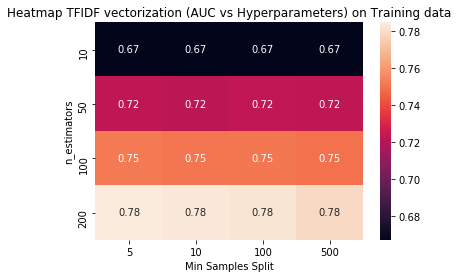

In [20]:
sns.heatmap(train_auc,annot=True,xticklabels=min_samples_split,yticklabels=n_estimators)
plt.title('Heatmap TFIDF vectorization (AUC vs Hyperparameters) on Training data')
plt.ylabel('n_estimators')
plt.xlabel('Min Samples Split')
plt.show()

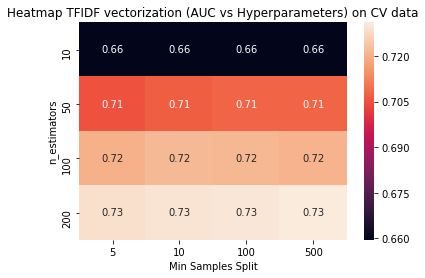

In [21]:
sns.heatmap(cv_auc,annot=True,xticklabels=min_samples_split,yticklabels=n_estimators)
plt.title('Heatmap TFIDF vectorization (AUC vs Hyperparameters) on CV data')
plt.ylabel('n_estimators')
plt.xlabel('Min Samples Split')
plt.show()

In [22]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score

clf1 = GradientBoostingClassifier(n_estimators = 200,min_samples_split=500)
clf1.fit(X_tr_tfidf, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = batch_predict(clf1, X_tr_tfidf)    
y_test_pred = batch_predict(clf1, X_te_tfidf)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

y_test_class = list(map(lambda x:1 if x>=0.5 else 0, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_class).ravel()
print('Confusion Matrix')
print('================')
print(np.array([[tn, tp],[fn, fp]]))
print('Accuracy Score: ',accuracy_score(y_test, y_test_class))

Confusion Matrix
[[   83 13856]
 [   51  2398]]
Accuracy Score:  0.8505613863802782


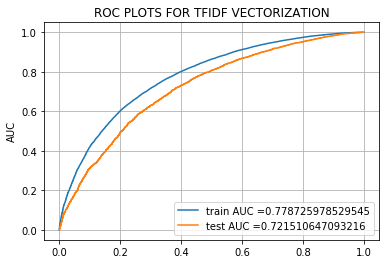

In [23]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
#plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC PLOTS FOR TFIDF VECTORIZATION")
plt.grid()
plt.show()

In [24]:
n_estimators=[10, 50, 100, 200]
min_samples_split=[5, 10, 100, 500]
train_auc = [[0 for samples in min_samples_split]for estimators in n_estimators]
cv_auc = [[0 for samples in min_samples_split]for estimators in n_estimators]
i=0
for estimators in n_estimators:
    j = 0
    for samples in min_samples_split:
        clf_tfidfw2v = GradientBoostingClassifier(n_estimators = estimators,min_samples_split=samples)
        clf_tfidfw2v.fit(X_tr_tfidfw2v, y_train)

        y_train_pred = batch_predict(clf_tfidfw2v, X_tr_tfidfw2v)    
        y_cv_pred = batch_predict(clf_tfidfw2v, X_cv_tfidfw2v)
        
        train_auc[i][j] = roc_auc_score(y_train,y_train_pred)
        cv_auc[i][j] = roc_auc_score(y_cv, y_cv_pred)
        j += 1
    i += 1

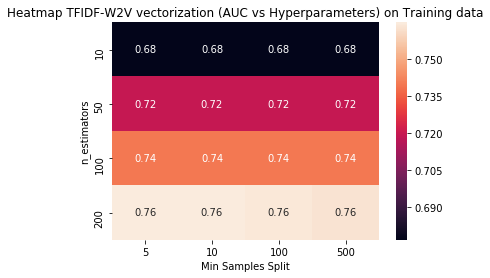

In [25]:
sns.heatmap(train_auc,annot=True,xticklabels=min_samples_split,yticklabels=n_estimators)
plt.title('Heatmap TFIDF-W2V vectorization (AUC vs Hyperparameters) on Training data')
plt.ylabel('n_estimators')
plt.xlabel('Min Samples Split')
plt.show()

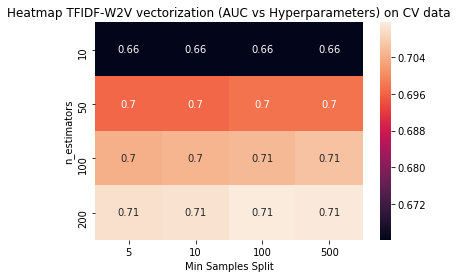

In [26]:
sns.heatmap(cv_auc,annot=True,xticklabels=min_samples_split,yticklabels=n_estimators)
plt.title('Heatmap TFIDF-W2V vectorization (AUC vs Hyperparameters) on CV data')
plt.ylabel('n_estimators')
plt.xlabel('Min Samples Split')
plt.show()

In [27]:
clf2 = GradientBoostingClassifier(n_estimators = 200,min_samples_split=500)
clf2.fit(X_tr_tfidfw2v, y_train)

y_train_pred = batch_predict(clf2, X_tr_tfidfw2v)    
y_test_pred = batch_predict(clf2, X_te_tfidfw2v)

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

y_test_class = list(map(lambda x:1 if x>=0.5 else 0, y_test_pred))
tn, fp, fn, tp = confusion_matrix(y_test, y_test_class).ravel()
print('Confusion Matrix')
print('================')
print(np.array([[tn, tp],[fn, fp]]))
print('Accuracy Score: ',accuracy_score(y_test, y_test_class))

Confusion Matrix
[[   75 13839]
 [   68  2406]]
Accuracy Score:  0.8490358799121308


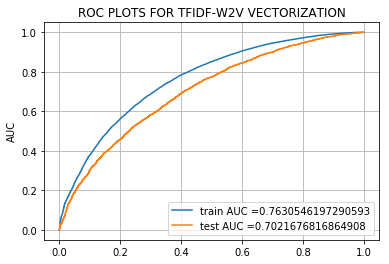

In [28]:
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
#plt.xlabel("K: hyperparameter")
plt.ylabel("AUC")
plt.title("ROC PLOTS FOR TFIDF-W2V VECTORIZATION")
plt.grid()
plt.show()

<h1>3. Summary</h1>

<br> as mentioned in the step 4 of instructions

In [29]:
print('+--------------------------+-------+------------------------+')
print('|       Vectorizer         | Model | Hyper Parameter |  AUC |')
print('+--------------------------+-------+------------------------+')
print('|          TFIDF           | Brute |    (200,500)    | 0.72 |')
print('+--------------------------+-------+------------------------+')   
print('|       TFIDF-W2V          | Brute |    (200,500)    | 0.70 |')
print('+--------------------------+-------+------------------------+')

+--------------------------+-------+------------------------+
|       Vectorizer         | Model | Hyper Parameter |  AUC |
+--------------------------+-------+------------------------+
|          TFIDF           | Brute |    (200,500)    | 0.72 |
+--------------------------+-------+------------------------+
|       TFIDF-W2V          | Brute |    (200,500)    | 0.70 |
+--------------------------+-------+------------------------+
